<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek34.do.txt  -->
<!-- dom:TITLE: Exercises week 34 -->

# Exercises week 34
**FYS-STK3155/4155**

Date: **August 21-25, 2023**

## Exercises

Here are three possible exercises for week 34

## Exercise 1: Setting up various Python environments

The first exercise here is of a mere technical art. We want you to have 
* git as a version control software and to establish a user account on a provider like GitHub. Other providers like GitLab etc are equally fine. You can also use the University of Oslo [GitHub facilities](https://www.uio.no/tjenester/it/maskin/filer/versjonskontroll/github.html). 

* Install various Python packages

We will make extensive use of Python as programming language and its
myriad of available libraries.  You will find
IPython/Jupyter notebooks invaluable in your work.  You can run **R**
codes in the Jupyter/IPython notebooks, with the immediate benefit of
visualizing your data. You can also use compiled languages like C++,
Rust, Fortran etc if you prefer. The focus in these lectures will be
on Python.

If you have Python installed (we recommend Python3) and you feel
pretty familiar with installing different packages, we recommend that
you install the following Python packages via **pip** as 

1. pip install numpy scipy matplotlib ipython scikit-learn sympy pandas pillow 

For **Tensorflow**, we recommend following the instructions in the text of 
[Aurelien Geron, Hands‑On Machine Learning with Scikit‑Learn and TensorFlow, O'Reilly](http://shop.oreilly.com/product/0636920052289.do)

We will come back to **tensorflow** later. 

For Python3, replace **pip** with **pip3**.

For OSX users we recommend, after having installed Xcode, to
install **brew**. Brew allows for a seamless installation of additional
software via for example 

1. brew install python3

For Linux users, with its variety of distributions like for example the widely popular Ubuntu distribution,
you can use **pip** as well and simply install Python as 

1. sudo apt-get install python3  (or python for Python2.7)

If you don't want to perform these operations separately and venture
into the hassle of exploring how to set up dependencies and paths, we
recommend two widely used distrubutions which set up all relevant
dependencies for Python, namely 

* [Anaconda](https://docs.anaconda.com/), 

which is an open source
distribution of the Python and R programming languages for large-scale
data processing, predictive analytics, and scientific computing, that
aims to simplify package management and deployment. Package versions
are managed by the package management system **conda**. 

* [Enthought canopy](https://www.enthought.com/product/canopy/) 

is a Python
distribution for scientific and analytic computing distribution and
analysis environment, available for free and under a commercial
license.

We recommend using **Anaconda** if you are not too familiar with setting paths in a terminal environment.

## Exercise 2: making your own data and exploring scikit-learn

We will generate our own dataset for a function $y(x)$ where $x \in [0,1]$ and defined by random numbers computed with the uniform distribution. The function $y$ is a quadratic polynomial in $x$ with added stochastic noise according to the normal distribution $\cal {N}(0,1)$.
The following simple Python instructions define our $x$ and $y$ values (with 100 data points).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.rand(100,1)
x=np.sort(x,axis=0)
y = 2.0+5*x*x+0.1*np.random.randn(100,1)

1. Write your own code (following the examples under the [regression notes](https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter1.html)) for computing the parametrization of the data set fitting a second-order polynomial. 

2. Use thereafter **scikit-learn** (see again the examples in the regression slides) and compare with your own code.   

3. Using scikit-learn, compute also the mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error defined as

$$
MSE(\boldsymbol{y},\boldsymbol{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.
If $\tilde{\boldsymbol{y}}_i$ is the predicted value of the $i-th$ sample and $y_i$ is the corresponding true value, then the score $R^2$ is defined as

$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\boldsymbol{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

You can use the functionality included in scikit-learn. If you feel for it, you can use your own program and define functions which compute the above two functions. 
Discuss the meaning of these results. Try also to vary the coefficient in front of the added stochastic noise term and discuss the quality of the fits.

## Exercise 3: Split data in test and training data

In this exercise we want you to to compute the MSE for the training
data and the test data as function of the complexity of a polynomial,
that is the degree of a given polynomial.

The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf).

Our data is defined by $x\in [-3,3]$ with a total of for example $n=100$ data points. You should try to vary the number of data points $n$ in your analysis.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
np.random.seed()
n = 100
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
x = np.sort(x, axis=0)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

where $y$ is the function we want to fit with a given polynomial.

**a)**
Write a first code which sets up a design matrix $X$ defined by a fifth-order polynomial and split your data set in training and test data.

**b)**
Write thereafter (using either **scikit-learn** or your matrix inversion code using for example **numpy**)
and perform an ordinary least squares fitting and compute the mean squared error for the training data and the test data. These calculations should apply to a model given by a fifth-order polynomial.

**c)**
Add now a model which allows you to make polynomials up to degree $15$.  Perform a standard OLS fitting of the training data and compute the MSE for the training and test data and plot both test and training data MSE as functions of the polynomial degree. Compare what you see with Figure 2.11 of Hastie et al. Comment your results. For which polynomial degree do you find an optimal MSE (smallest value)?

## Réponses

Own code for OLS

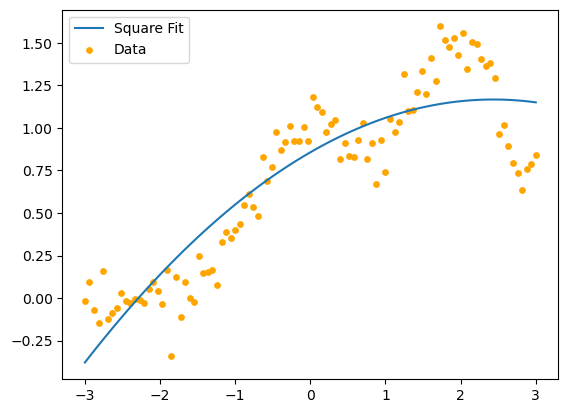

In [5]:
x=np.reshape(x, (100,))
y=np.reshape(y, (100,))
X = np.ones((len(x),3))
X[:,0] = 1.0
X[:,1] = x
X[:,2] = x**2
beta = (np.linalg.inv(X.T @ X) @ X.T ) @ y
ytilde = X @ beta
ownpoly2_plot=plt.plot(x, ytilde, label='Square Fit')
plt.scatter(x, y, label='Data', color='orange', s=15)
plt.legend()
plt.show()

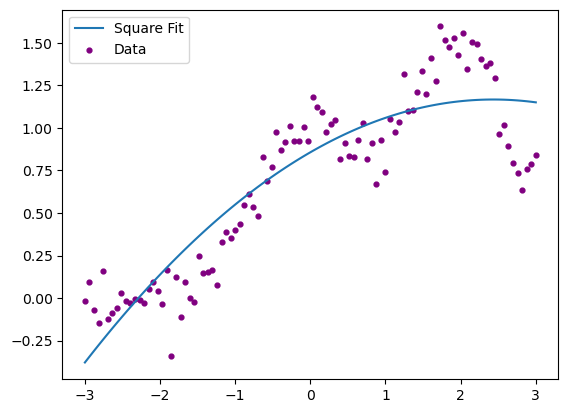

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
poly2 = PolynomialFeatures(degree=2)
X = poly2.fit_transform(x[:,np.newaxis])
clf2 = LinearRegression()
clf2.fit(X,y)

Xplot=poly2.fit_transform(x[:,np.newaxis])
poly2_plot=plt.plot(x, clf2.predict(Xplot), label='Square Fit')
plt.scatter(x, y, label='Data', color='purple', s=12)
plt.legend()
plt.show()

In [7]:
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
    
print('MSE')
print(MSE(y, ytilde))

print('R2')
print(R2(y, ytilde))

MSE
0.05307283362823949
R2
0.8050622852493813


### Exercice 3

In [9]:
x1 = x.reshape(n,)
X = np.ones((len(x),6))
X[:,0] = 1.0
X[:,1] = x1
X[:,2] = x1**2
X[:,3] = x1**3
X[:,4] = x1**4
X[:,5] = x1**5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
#fitting
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(beta)

#prediction
ytilde = X_train @ beta
ypredict = X_test @ beta

#test
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

print("Training R2")
print(R2(y_train,ytilde))
print("Training MSE")
print(MSE(y_train,ytilde))
print("Test R2")
print(R2(y_test,ypredict))
print("Test MSE")
print(MSE(y_test,ypredict))

[ 0.83700462  0.2788303  -0.03132328  0.04570545 -0.00233371 -0.00768403]
Training R2
0.9168178595861958
Training MSE
0.022951519360422373
Test R2
0.8458273513417663
Test MSE
0.03931496668519596


In [12]:
maxdegree = 15
TestError = np.zeros(maxdegree)
TrainError = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    clf = model.fit(x_train,y_train)
    y_fit = clf.predict(x_train)
    y_pred = clf.predict(x_test) 
    polydegree[degree] = degree
    TestError[degree] = MSE(y_test, y_pred)
    TrainError[degree] = MSE(y_train, y_fit)

plt.plot(polydegree, TestError, label='Test Error')
plt.plot(polydegree, TrainError, label='Train Error')
plt.legend()
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.75757576  1.12121212 -0.93939394 -2.75757576 -0.6969697   0.93939394
 -1.54545455 -2.93939394 -1.96969697  1.36363636  0.03030303  0.63636364
 -2.15151515 -1.66666667 -2.27272727 -2.81818182  0.39393939 -2.03030303
  2.45454545  2.33333333 -2.63636364  1.66666667 -0.33333333  2.6969697
 -1.18181818 -0.81818182 -2.45454545  1.42424242  2.63636364  1.06060606
  0.21212121 -1.48484848  2.81818182 -1.06060606  0.09090909  1.18181818
  1.48484848 -0.63636364  3.          2.27272727  0.6969697   1.3030303
  2.15151515  0.57575758 -2.87878788 -1.36363636  0.33333333  0.45454545
  1.96969697 -0.21212121  2.75757576 -2.09090909  0.87878788 -2.57575758
  1.          1.72727273 -0.45454545 -0.75757576  1.60606061 -2.6969697
  0.15151515  2.57575758 -1.12121212  2.51515152  2.39393939 -0.57575758
 -0.03030303 -2.39393939 -1.60606061  1.84848485 -2.33333333 -2.21212121
 -1.72727273 -1.84848485  0.81818182  0.27272727  2.21212121 -1.90909091
  1.54545455 -0.15151515].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.